# Test Trained Model

In [1]:
import shutil
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append('../')
from torchsummary.torchsummary import summary
from dataloaderNoob import VOC
import numpy as np
import matplotlib.pyplot as plt
import yolov1_small_test
from utilities.utils import detection_collate_test
from utilities.utils import save_checkpoint
from yolov1_small_test import detection_loss

# 1. Set Device & hyperparameters

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

num_epochs = 16000
num_classes = 1
batch_size = 15
learning_rate = 1e-3
dropout_prop = 0.5

# 2. Set Dataset

In [3]:
DATASET_PATH_MARTIN = "/media/keti-ai/AI_HARD3/DataSets/VOC_Pascal/VOC/VOCdevkit/VOC2012"
DATASET_PATH_JAEWON = "H:\VOC\VOC12\VOCdevkit_2\VOC2012"
SMALL_DATASET_PATH = "D:/dataset/person-300"
train_dataset = VOC(root = SMALL_DATASET_PATH,
                    transform=transforms.ToTensor(), cls_option = True, selective_cls="person")


VOC Parsing:   |████████████████████████████████████████| 100.0% (300/300)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (300/300)  Complete



In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           collate_fn=detection_collate_test)

# 3. Load checkpoint

In [5]:
checkpoint = torch.load("../checkpoints/checkpoint_2700.pth.tar")

# 4. Load Model

In [6]:
net = yolov1_small_test.SmallYOLOv1()
# visualize_weights_distribution(net)
use_cuda = torch.cuda.is_available()

In [7]:
device = torch.device("cuda" if use_cuda else "cpu")
model = yolov1_small_test.SmallYOLOv1().to(device)
#model = torch.nn.DataParallel(net, device_ids=[0]).cuda()
#summary(model, (3, 448,448))
model.load_state_dict(checkpoint['state_dict'])

# 5. Read Images

In [8]:
images, labels, sizes = iter(train_loader).next()
images = images.to(device)
labels = labels.to(device)

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [ ]:
#for just a image
outputs = model(torch.cuda.FloatTensor(images))
print(outputs.shape)

# 6. Get & Plot Original Images

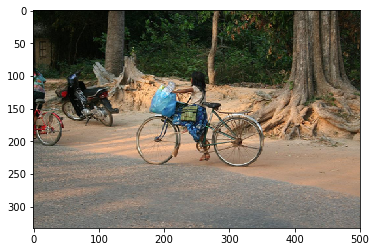

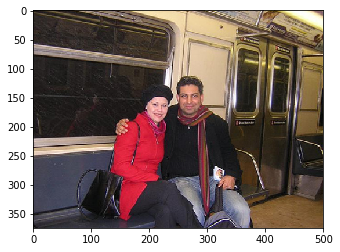

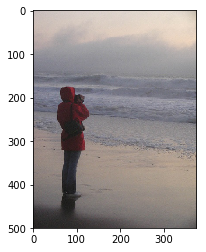

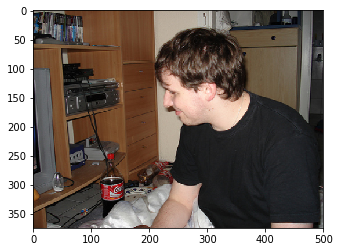

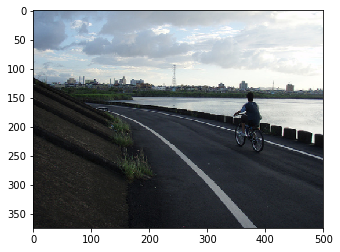

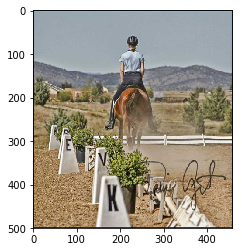

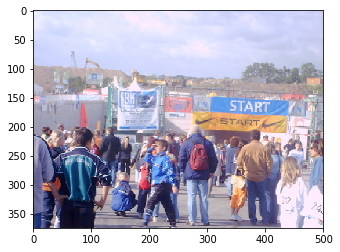

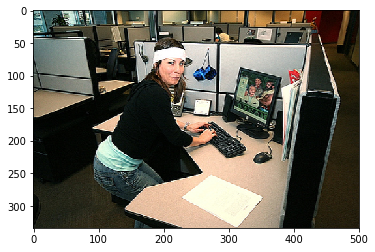

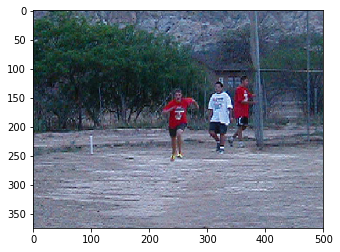

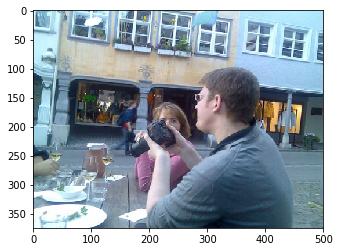

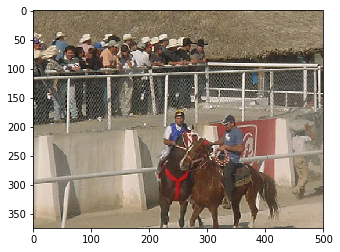

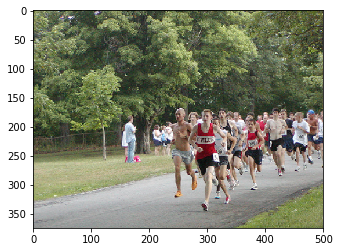

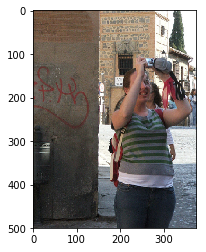

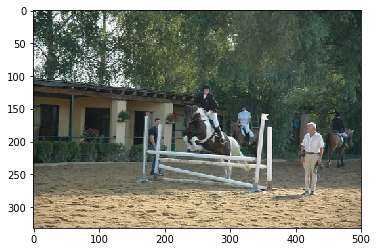

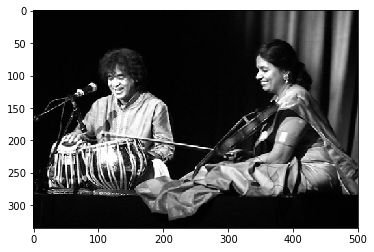

In [22]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

resizedImages = []

for num in range(len(outputs)):
    current_Image = images[num]
    
    src = np.transpose(current_Image,(1,2,0))
    src = src * 255
    src = src.numpy().astype(np.uint8).copy()

    resizedImages.append(cv2.resize(src,sizes[num]))
    plt.imshow(resizedImages[num])                  
    plt.show()

# 7. split the image into a grid (7x7)

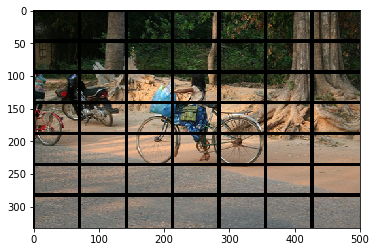

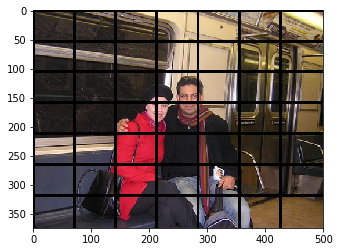

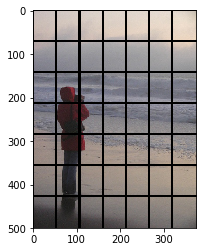

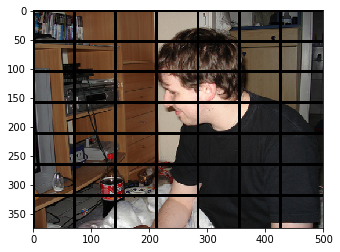

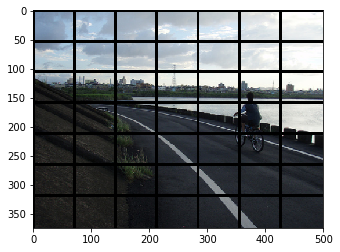

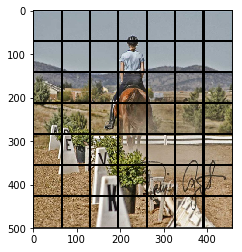

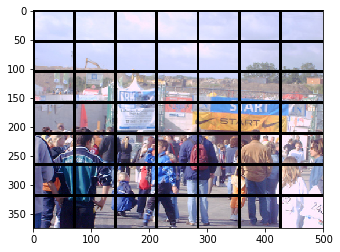

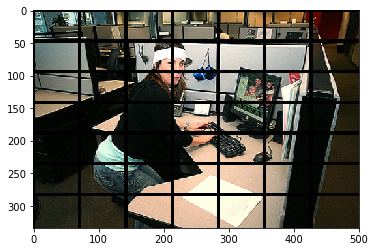

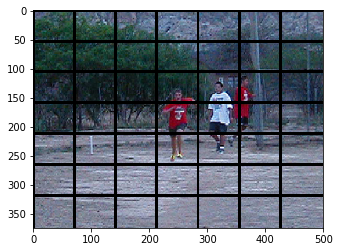

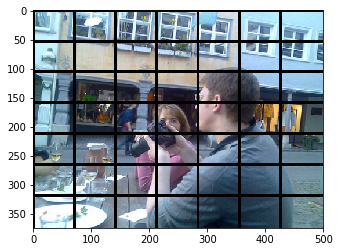

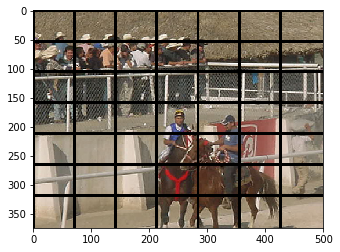

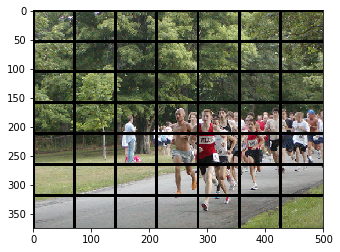

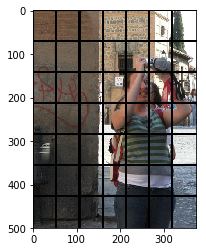

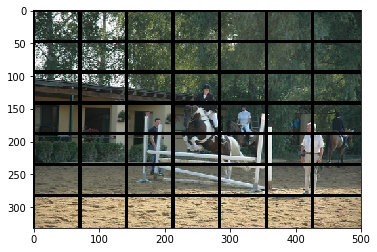

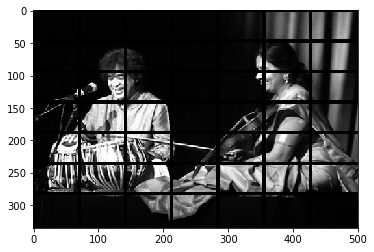

In [32]:
def DrawGrid7x7(src, sizes):
    dst = src.copy()
    
    for i in range(7):
        width = sizes[num][0]
        height = sizes[num][1]
        unit_x = sizes[num][0] // 7
        unit_y = sizes[num][1] // 7
        
        img = cv2.line(src, (unit_x*i, 0), (unit_x*i, height), (0,0,0), 3)
        img = cv2.line(src, (0, unit_y*i), (width, unit_y*i), (0,0,0), 3)
        
    return img

for num in range(len(outputs)):
    dst = DrawGrid7x7(resizedImages[num], sizes)   
    plt.imshow(dst)
    plt.show()

# 8. Draw Ground Truth Grids & BBoxes

**Ground Truth Grid**

In [48]:
def DrawPatches(src, coords, sizes):
    dst = src.copy()
    print('coord : ',coords)
    for coord in coords:
        width = sizes[num][0]
        height = sizes[num][1]
        unit_x = sizes[num][0] // 7
        unit_y = sizes[num][1] // 7
        
        img = cv2.rectangle(src, (unit_x * coord[0], unit_x * coord[1]), (unit_x * coord[0] + unit_x, unit_y * coord[1] + unit_y ), (255,0,0), 3)
        #img = cv2.line(src, (0, unit_y*i), (width, unit_y*i), (0,0,0), 3)
        
    return img

idx = 0
coords = []
gridCoords = np.where(labels[idx,:,:,0]==1)
numObjects = len(gridCoords[0])


for idx in range(numObjects):
    X = gridCoords[1][idx]
    Y = gridCoords[0][idx]
    coords.append([X,Y])
    
DrawPatches(resizedImages[num],coords)


coord :  [[2, 2], [1, 6]]
[2, 2]
[1, 6]


In [35]:
gridCoords

(array([2, 6], dtype=int64), array([2, 1], dtype=int64))

    # output tensor slice
    objness1_output = output[:, :, :, 0]
    x_offset1_output = output[:, :, :, 1]
    y_offset1_output = output[:, :, :, 2]
    width_ratio1_output = output[:, :, :, 3]
    height_ratio1_output = output[:, :, :, 4]
    class_output = output[:, :, :, 5]

    # label tensor slice
    objness_label = target[:, :, :, 0]
    class_label = target[:, :, :, 1]
    x_offset_label = target[:, :, :, 2]
    y_offset_label = target[:, :, :, 3]
    width_ratio_label = target[:, :, :, 4]
    height_ratio_label = target[:, :, :, 5]

# 1. Confidence

In [ ]:
print(outputs[num,:,:,0])
print(labels[num,:,:,0])

# 2. class output

In [ ]:
print(outputs[0,:,:,5])
print(labels[0,:,:,1])

# 3. W/H

In [ ]:
width_ratio_label = labels[:, :, :, 4]
height_ratio_label = labels[:, :, :, 5]

print(width_ratio_label * 448)
print(height_ratio_label* 448)

In [ ]:
def calcMinMaxXY(indice_xy, norm_xywh, original_wh):
    x_index = indice_xy[0] + 1
    y_index = indice_xy[1] + 1
        
    width = norm_xywh[2] * norm_xywh[2] * original_wh[0]
    height = norm_xywh[3] * norm_xywh[3] * original_wh[1]
  
    center_x = (norm_xywh[0] + x_index / 7) * original_wh[0]
    center_y = (norm_xywh[1] + y_index / 7) * original_wh[1]
    
    xMin = center_x - width / 2
    yMin = center_y - height / 2
    xMax = center_x + width / 2
    yMax = center_y + height / 2

    return xMin, yMin, xMax, yMax, center_x, center_y, width, height

In [ ]:
result = np.where(labels[0,:,:,0]==1)
X = result[1][0]
Y = result[0][0]
src = np.transpose(current_Image,(1,2,0))
src = src * 255
src = src.numpy().astype(np.uint8).copy()

indice_xy = [result[0][0], result[1][0]]
norm_xywh = [labels[0,Y,X,2],labels[0,Y,X,3],labels[0,Y,X,4],labels[0,Y,X,5]]
#original_wh = [size[0][0],size[0][1]]
original_wh = [500,332]
result = calcMinMaxXY(indice_xy, norm_xywh, original_wh)
dst = cv2.resize(src, (original_wh[0],original_wh[1]))
dst = cv2.rectangle(dst,(result[0], result[1]),(result[2], result[3]),(255,0,255),5)
plt.imshow(dst)

In [ ]:
result = np.where(labels[0,:,:,0]==1)
numObjects = len(result[0])

original_wh = [500,332]
dst = cv2.resize(src, (original_wh[0],original_wh[1]))

for idx in range(int(numObjects)):
    print('iter : ',idx)
    X = int(result[1][idx])
    Y = int(result[0][idx])
    print('X : ',X)
    print('Y : ',Y)
    src = np.transpose(current_Image,(1,2,0))
    src = src * 255
    src = src.numpy().astype(np.uint8).copy()

    indice_xy = [result[0][idx], result[1][idx]]
    norm_xywh = [labels[0,Y,X,2],labels[0,Y,X,3],labels[0,Y,X,4],labels[0,Y,X,5]]
    #original_wh = [size[0][0],size[0][1]]
    
    result2 = calcMinMaxXY(indice_xy, norm_xywh, original_wh)
    
    dst = cv2.rectangle(dst,(result2[0], result2[1]),(result2[2], result2[3]),(255,0,255),5)
plt.imshow(dst)
plt.show()

In [ ]:
idx

 # output tensor slice
    objness1_output = output[:, :, :, 0]
    x_offset1_output = output[:, :, :, 1]
    y_offset1_output = output[:, :, :, 2]
    width_ratio1_output = output[:, :, :, 3]
    height_ratio1_output = output[:, :, :, 4]
    class_output = output[:, :, :, 5]

In [ ]:
inference = outputs[num,:,:,0] > 0.7 
result = np.where(inference==1)
numObjects = len(result[0])
original_wh = [500,375]
dst = cv2.resize(src, (original_wh[0],original_wh[1]))

for idx in range(int(numObjects)):
    print('iter : ',idx)
    X = int(result[1][idx])
    Y = int(result[0][idx])
    print('X : ',X)
    print('Y : ',Y)
    src = np.transpose(current_Image,(1,2,0))
    src = src * 255
    src = src.numpy().astype(np.uint8).copy()
    indice_xy = [result[0][idx], result[1][idx]]
    norm_xywh = [outputs[0,Y,X,1],outputs[0,Y,X,2],outputs[0,Y,X,3],outputs[0,Y,X,4]]
    result2 = calcMinMaxXY(indice_xy, norm_xywh, original_wh)
    dst = cv2.rectangle(dst,(result2[0], result2[1]),(result2[2], result2[3]),(255,0,255),5)
    
plt.imshow(dst)
plt.show()

In [ ]:
inference

In [ ]:
labels[0,Y,X,1]